In [151]:
import numpy as np

from TidalPy.RadialSolver import radial_solver, build_rs_input_homogenous_layers
from TidalPy.rheology import Maxwell, Elastic, Andrade, Newton


host_mass = 6.898e27
semi_major_axis = 4.218e8
orbital_freq = 2.0 * np.pi / (32.46 * 60.0 * 60.0)
eccentricity = 0.0041

planet_radius = 1.821e6
forcing_frequency = orbital_freq

density_tuple = (7528., 3500)
static_bulk_modulus_tuple = (50.0e9, 100.0e9,)
static_shear_modulus_tuple = (00.0e9, 50.0e9,)
bulk_viscosity_tuple = (1.0e17,1.0e26,)
shear_viscosity_tuple = (1.0e22,1.0e17,)
layer_type_tuple = ('liquid', 'solid',)
layer_is_static_tuple = (False, False,)
layer_is_incompressible_tuple = (False, False,)
shear_rheology_model_tuple = (Newton(),Maxwell())
bulk_rheology_model_tuple = (Maxwell(),Elastic())
radius_fraction_tuple = (0.3,1.0)

rs_input = build_rs_input_homogenous_layers(
        planet_radius,
        forcing_frequency,
        density_tuple,
        static_bulk_modulus_tuple,
        static_shear_modulus_tuple,
        bulk_viscosity_tuple,
        shear_viscosity_tuple,
        layer_type_tuple,
        layer_is_static_tuple,
        layer_is_incompressible_tuple,
        shear_rheology_model_tuple,
        bulk_rheology_model_tuple,
        radius_fraction_tuple = radius_fraction_tuple,
        thickness_fraction_tuple = None,
        volume_fraction_tuple = None,
        slices_tuple = None,
        slice_per_layer = 50,
        perform_checks = True)


True


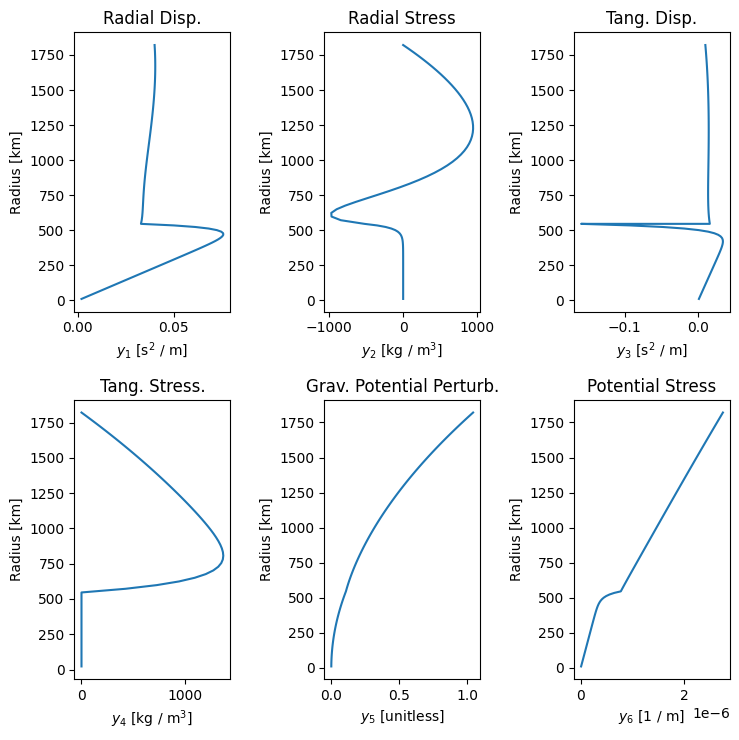

(<Figure size 750x750 with 6 Axes>,
 array([[<Axes: title={'center': 'Radial Disp.'}, xlabel='$y_{1}$ [s$^{2}$ / m]', ylabel='Radius [km]'>,
         <Axes: title={'center': 'Radial Stress'}, xlabel='$y_{2}$ [kg / m$^{3}$]', ylabel='Radius [km]'>,
         <Axes: title={'center': 'Tang. Disp.'}, xlabel='$y_{3}$ [s$^{2}$ / m]', ylabel='Radius [km]'>],
        [<Axes: title={'center': 'Tang. Stress.'}, xlabel='$y_{4}$ [kg / m$^{3}$]', ylabel='Radius [km]'>,
         <Axes: title={'center': 'Grav. Potential Perturb.'}, xlabel='$y_{5}$ [unitless]', ylabel='Radius [km]'>,
         <Axes: title={'center': 'Potential Stress'}, xlabel='$y_{6}$ [1 / m]', ylabel='Radius [km]'>]],
       dtype=object))

In [152]:
solution = radial_solver(*rs_input,
        integration_rtol=1.0e-15,
        integration_atol=1.0e-20)
# print(solution.bulk_modulus_array)
# print(solution.shear_modulus_array)
print(solution.success)
solution.plot_ys()

Total Heat = 2.104e+23 W (2.765e+23; 2.139e+23); Flux = 5048760454.505 W/m2.


[]

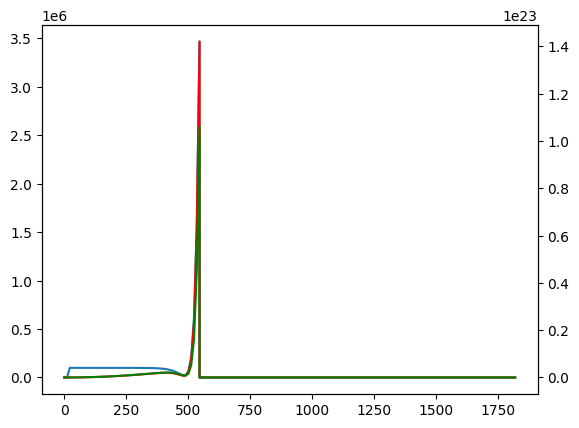

In [153]:
from TidalPy.tides.multilayer.heating import calc_radial_volumetric_tidal_heating_from_rs_solution

radial_heating = calc_radial_volumetric_tidal_heating_from_rs_solution(
    eccentricity,
    orbital_freq,
    semi_major_axis,
    host_mass,
    solution)

volume_array = (4./3.) * np.pi * (solution.radius_array[1:]**3 - solution.radius_array[:-1]**3)
volume_array = np.insert(volume_array, 0, 0.0)
radial_heating[np.isnan(radial_heating)] = 0.0

dr = solution.radius_array[1:] - solution.radius_array[:-1]
dr = np.insert(dr, 0, 0.0)

dV = 4 * np.pi * solution.radius_array**2 * dr
r_heating_trap = (1./2.) * (radial_heating[:-1] + radial_heating[1:]) * dV[1:]
r_heating_trap = np.insert(r_heating_trap, 0, 0.0)

alpha = radial_heating * 4 * np.pi * solution.radius_array**2
total_heating = np.trapz(alpha, solution.radius_array)
total_heating_sum = np.nansum(radial_heating * volume_array)

flux = total_heating / (4. * np.pi * planet_radius**2)
print(f"Total Heat = {total_heating:0.3e} W ({total_heating_sum:0.3e}; {np.sum(r_heating_trap):0.3e}); Flux = {flux:0.3f} W/m2.")

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(solution.radius_array/1000, radial_heating)
ax2 = ax.twinx()
ax2.plot(solution.radius_array/1000, radial_heating* volume_array, c='r')
ax2.plot(solution.radius_array/1000, r_heating_trap, c='g')
ax.set()

In [56]:
np.trapz(alpha, solution.radius_array)

25751290396741.43

In [37]:
np.trapz(dV)

2.529410509936473e+19

In [39]:
(4. / 3.)* np.pi * planet_radius**3

2.5294054308294996e+19